In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
sns.set(rc={'figure.figsize':(10,5)})
warnings.filterwarnings("ignore")


In [2]:
os.chdir('C:\\Users\\ToM\Downloads')

In [3]:
df=pd.read_excel('Fitogram Data Test.xlsx')

In [4]:
df.head()

,Studio Name,Country,Bookings All Time,Instant Book USC Integration,pro_booking_count,usc_booking_count,customer_booking_count,bookings_cancelled,events_held,percent_seats_occupied,occupied_seats_total,products_created,intercom_chats,payments_created,customers_created,nps_submitted,Vertical,Day
0,Dynamo Fitness,Germany,44.0,NaT,NaN,NaN,NaN,4.0,5.0,25.0,31.0,NaN,2.0,NaN,NaN,NaN,Other,2019-11-11
1,Yoga Yoga,Germany,17981.0,2018-12-03 15:24:38,NaN,36.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Outdoor,2019-11-11
2,PilatesRocks,Germany,1600.0,NaT,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,2019-11-11
3,Fitness Place,Germany,320.0,NaT,2.0,NaN,5.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,CrossFit®,2019-11-11
4,Super Swim,Germany,1310.0,NaT,10.0,NaN,NaN,NaN,2.0,14.0,10.0,NaN,NaN,1.0,NaN,NaN,Dance,2019-11-11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
Studio Name                      119 non-null object
Country                          119 non-null object
Bookings All Time                119 non-null float64
 Instant Book USC Integration    34 non-null datetime64[ns]
pro_booking_count                46 non-null float64
usc_booking_count                33 non-null float64
customer_booking_count           54 non-null float64
bookings_cancelled               50 non-null float64
events_held                      106 non-null float64
percent_seats_occupied           57 non-null float64
occupied_seats_total             57 non-null float64
products_created                 3 non-null float64
intercom_chats                   15 non-null float64
payments_created                 32 non-null float64
customers_created                6 non-null float64
nps_submitted                    13 non-null float64
Vertical                         119 non

In [6]:
df.describe()

,Bookings All Time,pro_booking_count,usc_booking_count,customer_booking_count,bookings_cancelled,events_held,percent_seats_occupied,occupied_seats_total,products_created,intercom_chats,payments_created,customers_created,nps_submitted
count,119.000000,46.000000,33.000000,54.000000,50.00000,106.000000,57.000000,57.000000,3.000000,15.000000,32.00000,6.000000,13.000000
mean,3319.504202,15.673913,11.212121,18.629630,7.44000,4.688679,42.561404,23.105263,2.666667,5.866667,3.06250,4.000000,5.923077
std,5840.006808,29.613101,20.198635,24.704515,13.03709,5.430712,29.225122,27.265025,2.886751,5.817052,2.65108,2.280351,3.200561
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,247.500000,2.000000,3.000000,4.250000,1.00000,1.250000,20.000000,6.000000,1.000000,1.500000,1.00000,2.250000,3.000000
50%,971.000000,5.000000,4.000000,9.500000,3.00000,3.000000,41.000000,12.000000,1.000000,4.000000,2.00000,4.500000,5.000000
75%,3409.000000,13.500000,8.000000,20.000000,6.75000,5.000000,62.000000,31.000000,3.500000,7.000000,4.00000,6.000000,9.000000
max,41970.000000,173.000000,102.000000,127.000000,60.00000,29.000000,142.000000,143.000000,6.000000,19.000000,11.00000,6.000000,10.000000


## Data Preprocessing 

### Percetage of Null values in the data-set


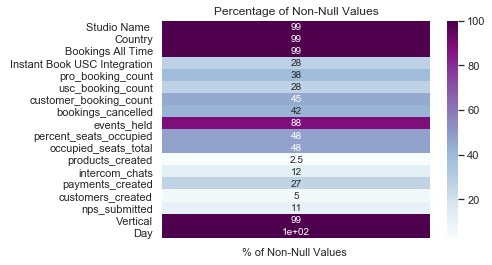

In [7]:
plt.title('Percentage of Non-Null Values')
sns.heatmap((100-(df.isnull().sum()/len(df))*100).to_frame().rename(columns={0:'% of Non-Null Values '}),annot=True,cmap='BuPu')
plt.show()

In [8]:
# Rows having no values 
df[df['Studio Name '].isna()]

,Studio Name,Country,Bookings All Time,Instant Book USC Integration,pro_booking_count,usc_booking_count,customer_booking_count,bookings_cancelled,events_held,percent_seats_occupied,occupied_seats_total,products_created,intercom_chats,payments_created,customers_created,nps_submitted,Vertical,Day
119,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-11


### Dropping rows with no values

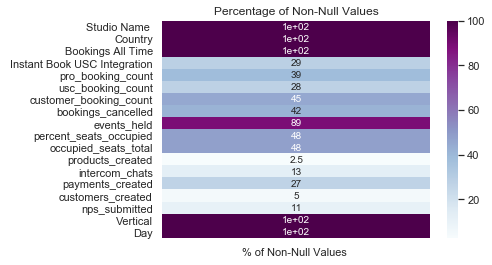

In [9]:
df.dropna(subset=['Studio Name '],inplace=True)
# Percentage of non-Null values 
plt.title('Percentage of Non-Null Values')
sns.heatmap((100-(df.isnull().sum()/len(df))*100).to_frame().rename(columns={0:'% of Non-Null Values '}),annot=True,cmap='BuPu')
plt.show()

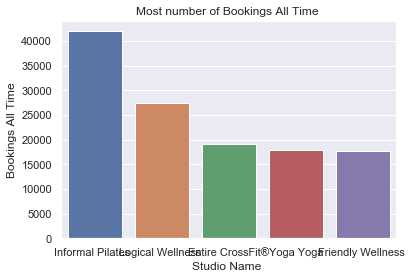

In [10]:
plt.title('Most number of Bookings All Time ')
most_bookings=df[['Studio Name ','Bookings All Time']].sort_index(by=['Bookings All Time'],ascending=False)
sns.barplot(x='Studio Name ',y='Bookings All Time' ,data=most_bookings[:5])
plt.show()

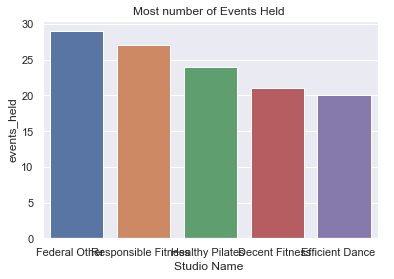

In [11]:
plt.title('Most number of Events Held ')
most_events_held=df[['Studio Name ','Bookings All Time','events_held']].sort_index(by=['events_held'],ascending=False)
sns.barplot(x='Studio Name ',y='events_held',data=most_events_held[:5])
plt.show()

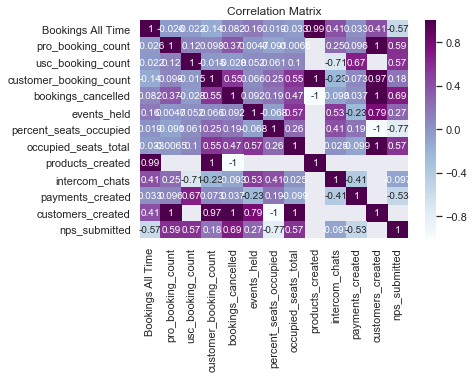

In [12]:
# Correlation Matrix (Pearson's r)
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show()

In [13]:
dfx=df.fillna(0,)

In [14]:
dfx['Engagement Score'] = dfx['Bookings All Time']*0.6 + dfx['pro_booking_count']*0.7+ dfx['usc_booking_count']*0.9+ \
dfx['customer_booking_count']*1+dfx['events_held']*0.7+dfx['percent_seats_occupied']*0.5+\
dfx['products_created']*0.5+dfx['intercom_chats']*0.7+dfx['payments_created']*0.8+dfx['customers_created']*0.8-dfx['bookings_cancelled']*0.6+dfx['nps_submitted'] *0.3

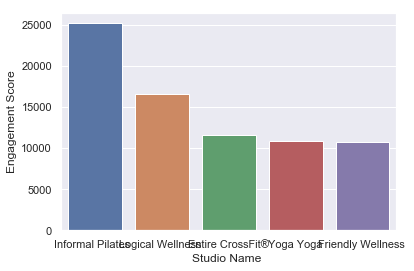

In [15]:
dfx.sort_values(by='Engagement Score',inplace=True,ascending=False)
sns.barplot(y='Engagement Score',x='Studio Name ',data=dfx[:5])

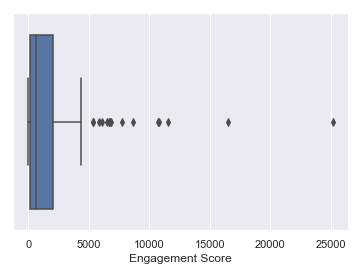

In [16]:
sns.boxplot(dfx['Engagement Score'])

(array([92., 12.,  8.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([5.100000e+00, 2.522070e+03, 5.039040e+03, 7.556010e+03,
        1.007298e+04, 1.258995e+04, 1.510692e+04, 1.762389e+04,
        2.014086e+04, 2.265783e+04, 2.517480e+04]),
 <a list of 10 Patch objects>)

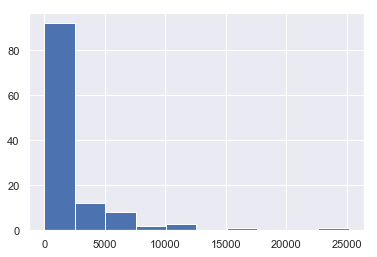

In [17]:
plt.hist(dfx['Engagement Score'])

(array([92., 12.,  8.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([5.100000e+00, 2.522070e+03, 5.039040e+03, 7.556010e+03,
        1.007298e+04, 1.258995e+04, 1.510692e+04, 1.762389e+04,
        2.014086e+04, 2.265783e+04, 2.517480e+04]),
 <a list of 10 Patch objects>)

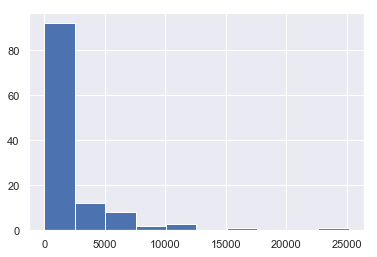

In [18]:
plt.hist(dfx['Engagement Score'])

In [19]:
bins=[0,3000,6000,9000,50000]
labels=['Light Users','Medium Users','Heavy Users','Super Users']

In [20]:
dfx['User Cohort']=pd.cut(dfx['Engagement Score'],bins=bins,labels=labels)

In [21]:
dfx['User Cohort'].value_counts()

Light Users     95
Medium Users    12
Heavy Users      7
Super Users      5
Name: User Cohort, dtype: int64

In [22]:
dfx.to_excel('fitogram_transformed_data.xlsx')